In [29]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [30]:
path_demand = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
path_comm_prices = "../../Data/CSV_Files/Gas_Price_Com.csv"
path_elec_prices = "../../Data/CSV_Files/Gas_Price_Elec.csv"
path_ind_prices = "../../Data/CSV_Files/Gas_Price_Ind.csv"
path_res_prices = "../../Data/CSV_Files/Gas_Price_Res.csv"

comm_prices=pd.read_csv(path_comm_prices, sep=",")
elec_prices=pd.read_csv(path_elec_prices, sep=",")
ind_prices=pd.read_csv(path_ind_prices, sep=",")
res_prices=pd.read_csv(path_res_prices, sep=",")

comm_prices["Date"] =  pd.to_datetime(comm_prices["Date"])
comm_prices = comm_prices.rename(columns={"Price":"comm price"})
comm_prices = comm_prices.loc[comm_prices["Area"] == "U.S."]
elec_prices["Date"] =  pd.to_datetime(elec_prices["Date"])
elec_prices = elec_prices.rename(columns={"Price":"elec price"})
elec_prices = elec_prices.loc[elec_prices["Area"] == "U.S."]
ind_prices["Date"] =  pd.to_datetime(ind_prices["Date"])
ind_prices = ind_prices.rename(columns={"Price":"ind price"})
ind_prices = ind_prices.loc[ind_prices["Area"] == "U.S."]
res_prices["Date"] =  pd.to_datetime(res_prices["Date"])
res_prices = res_prices.rename(columns={"Price":"res price"})
res_prices = res_prices.loc[res_prices["Area"] == "U.S."]

comm_prices.set_index("Date",inplace=True)
elec_prices.set_index("Date",inplace=True)
ind_prices.set_index("Date",inplace=True)
res_prices.set_index("Date",inplace=True)

data = pd.read_csv(path_demand, sep=",")
data["Date"] =  pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data = data[["Consumption(Bscf)"]]
data = data.rename(columns={"Consumption(Bscf)":"energy"})

In [18]:
elec_prices

,Unnamed: 0,Area,elec price
Date,,,
2019-04-01,0,U.S.,2.98
2019-03-01,1,U.S.,3.59
2019-02-01,2,U.S.,3.79
2019-01-01,3,U.S.,4.16
2018-12-01,4,U.S.,4.89
2018-11-01,5,U.S.,4.32
2018-10-01,6,U.S.,3.50
2018-09-01,7,U.S.,3.21
2018-08-01,8,U.S.,3.39


In [31]:
data=data.merge(comm_prices[["comm price"]],how='outer',left_index=True, right_index=True)
data.head()

,energy,comm price
Date,,
1983-10-01,NaN,5.62
1983-11-01,NaN,5.67
1983-12-01,NaN,5.62
1984-01-01,NaN,5.49
1984-02-01,NaN,5.54


In [32]:
data=data.merge(elec_prices[["elec price"]],how='outer',left_index=True, right_index=True)
data.head()

,energy,comm price,elec price
Date,,,
1983-10-01,NaN,5.62,NaN
1983-11-01,NaN,5.67,NaN
1983-12-01,NaN,5.62,NaN
1984-01-01,NaN,5.49,NaN
1984-02-01,NaN,5.54,NaN


In [33]:
data=data.merge(ind_prices[["ind price"]],how='outer',left_index=True, right_index=True)
data.head()

,energy,comm price,elec price,ind price
Date,,,,
1983-10-01,NaN,5.62,NaN,NaN
1983-11-01,NaN,5.67,NaN,NaN
1983-12-01,NaN,5.62,NaN,NaN
1984-01-01,NaN,5.49,NaN,NaN
1984-02-01,NaN,5.54,NaN,NaN


In [34]:
data=data.merge(res_prices[["res price"]],how='outer',left_index=True, right_index=True)
data.head()

,energy,comm price,elec price,ind price,res price
Date,,,,,
1981-01-01,NaN,NaN,NaN,NaN,3.94
1981-02-01,NaN,NaN,NaN,NaN,3.99
1981-03-01,NaN,NaN,NaN,NaN,4.06
1981-04-01,NaN,NaN,NaN,NaN,4.11
1981-05-01,NaN,NaN,NaN,NaN,4.29


In [58]:
data.dropna(inplace=True)
data.sort_values(by=['Date'], inplace=True, ascending=False)
data.head()

,energy,comm price,elec price,ind price,res price,year,qtr,month,ix,log(energy),target,normalized_comm_price,normalized_elec_price,normalized_ind_price,normalized_res_price
Date,,,,,,,,,,,,,,,
2019-04-01,2182.901,7.77,2.98,4.02,10.92,2019,2,4,207,7.688410,0.252437,-0.829194,-1.145841,-0.800668,-0.565139
2019-03-01,2882.561,7.47,3.59,4.33,9.48,2019,1,3,206,7.966434,1.829247,-0.997515,-0.838760,-0.644653,-1.060735
2019-02-01,2983.892,7.61,3.79,4.65,9.47,2019,1,2,205,8.000984,2.057615,-0.918965,-0.738078,-0.483605,-1.064176
2019-01-01,3379.295,7.75,4.16,5.04,9.43,2019,1,1,204,8.125422,2.948726,-0.840416,-0.551816,-0.287327,-1.077943
2018-12-01,2958.554,7.77,4.89,5.46,9.63,2018,4,12,203,7.992456,2.000511,-0.829194,-0.184326,-0.075951,-1.009110


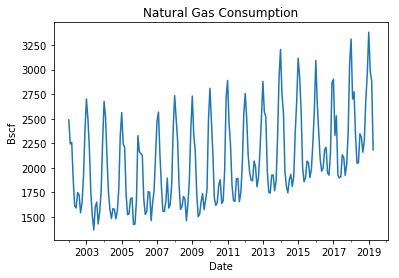

In [38]:
data['energy'].plot(title="Natural Gas Consumption")
plt.ylabel("Bscf")
plt.show()


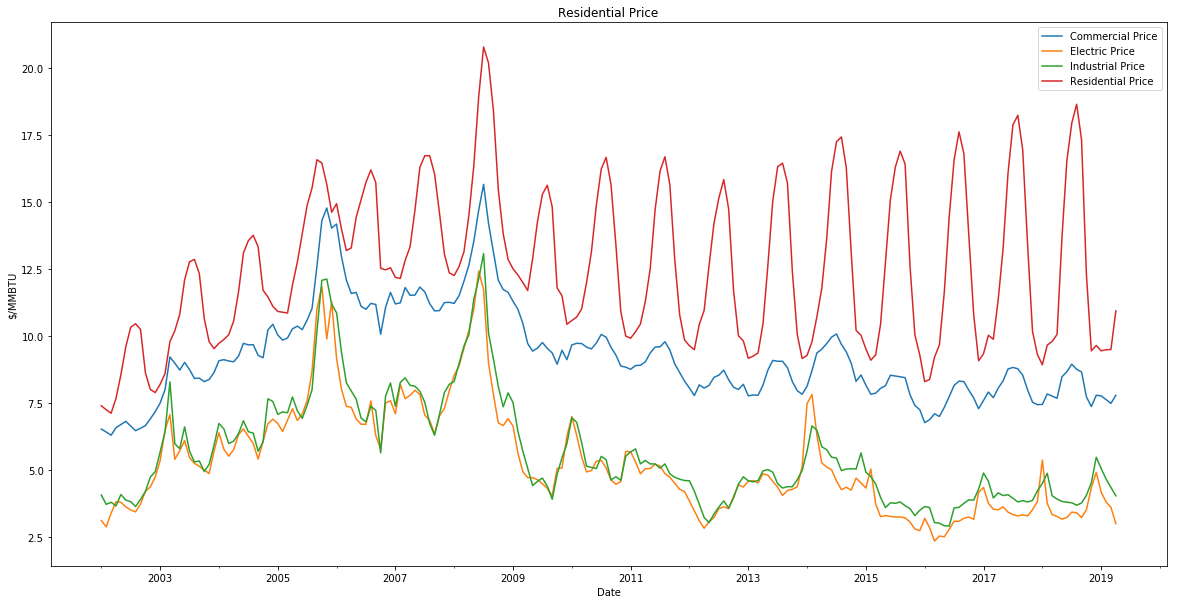

In [64]:
plt.figure(figsize=(20,10))
data['comm price'].plot(title="Commercial Price", label="Commercial Price")
data['elec price'].plot(title="Electric Price", label="Electric Price")
data['ind price'].plot(title="Industrial Price", label="Industrial Price")
data['res price'].plot(title="Residential Price", label="Residential Price")
plt.ylabel("$/MMBTU")
plt.legend()
plt.show()

In [42]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["month"] = data.index.month
data["ix"] = range(0,len(data))
data["log(energy)"]=np.log(data["energy"])
# data["log(price)"]=np.log(data["price"])
data.head()


,energy,comm price,elec price,ind price,res price,year,qtr,month,ix,log(energy)
Date,,,,,,,,,,
2002-01-01,2487.638,6.51,3.10,4.05,7.38,2002,1,1,0,7.819089
2002-02-01,2242.427,6.40,2.86,3.70,7.23,2002,1,2,1,7.715314
2002-03-01,2258.431,6.28,3.37,3.78,7.10,2002,1,3,2,7.722426
2002-04-01,1880.985,6.56,3.80,3.64,7.66,2002,2,4,3,7.539551
2002-05-01,1611.453,6.68,3.78,4.07,8.54,2002,2,5,4,7.384892


# Target Analyisis: Normality

In [43]:
mean_of_log = data["log(energy)"].mean()
std_of_log = data["log(energy)"].std()
skew_of_log = data["log(energy)"].skew()
ex_kurt_of_log = data["log(energy)"].kurtosis()

# mean_of_price_log = data["log(price)"].mean()
# std_of_price_log = data["log(price)"].std()
# skew_of_price_log = data["log(price)"].skew()
# ex_kurt_of_price_log = data["log(price)"].kurtosis()

mean = data["energy"].mean()
std = data["energy"].std()
skew = data["energy"].skew()
ex_kurt = data["energy"].kurtosis()

mean_comm_price = data["comm price"].mean()
std_comm_price = data["comm price"].std()
skew_comm_price = data["comm price"].skew()
ex_kurt_comm_price = data["comm price"].kurtosis()

mean_elec_price = data["elec price"].mean()
std_elec_price = data["elec price"].std()
skew_elec_price = data["elec price"].skew()
ex_kurt_elec_price = data["elec price"].kurtosis()

mean_ind_price = data["ind price"].mean()
std_ind_price = data["ind price"].std()
skew_ind_price = data["ind price"].skew()
ex_kurt_ind_price = data["ind price"].kurtosis()

mean_res_price = data["res price"].mean()
std_res_price = data["res price"].std()
skew_res_price = data["res price"].skew()
ex_kurt_res_price = data["res price"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")
print(f"Mean of log of data: {mean_of_log} \n Std of log of data: {std_of_log} \n Skew of log of data: {skew_of_log} \n Kurtosis of log of data: {ex_kurt_of_log+3}")

Mean: 2070.889860576924 
 Std: 443.7187465577791 
 Skew: 0.7020934905107894 
 Kurtosis: 2.7416628747005642
Mean of log of data: 7.613994192546105 
 Std of log of data: 0.20688527780203095 
 Skew of log of data: 0.3473808955963883 
 Kurtosis of log of data: 2.2284752784643773


In [44]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data["log(energy)"], alpha=0.05)


H0: Data was drawn from a Normal Ditribution
pval 0.00025263288989663124 is lower than significance level: 0.05, therefore null hypothesis is rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


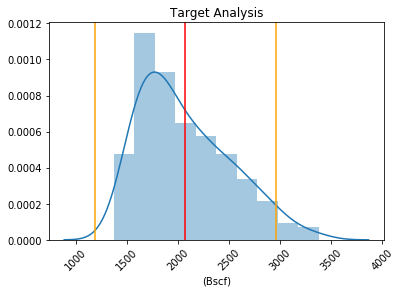

In [45]:
# histogram of unaltered data
sns.distplot(data["energy"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


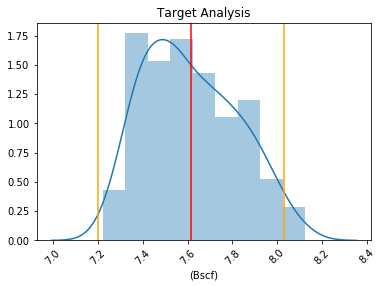

In [46]:
# histogram of log of data
sns.distplot(data["log(energy)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean_of_log, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean_of_log))
plt.axvline(x=mean_of_log+2*std_of_log, color='orange', linestyle='-')
plt.axvline(x=mean_of_log-2*std_of_log, color='orange', linestyle='-')
plt.show()

In [47]:
# # histogram of log of price
# sns.distplot(data["log(price)"])
# plt.title("Target Analysis")
# plt.xticks(rotation=45)
# plt.xlabel("($/MMBTU)")
# plt.axvline(x=mean_of_price_log, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean_of_price_log))
# plt.axvline(x=mean_of_price_log+2*std_of_price_log, color='orange', linestyle='-')
# plt.axvline(x=mean_of_price_log-2*std_of_price_log, color='orange', linestyle='-')
# plt.show()

Broadly speaking, data does not look like a normal distribution, because it has a small left tail and the chance of observing extreme values is smaller, comparing to normally distributed data

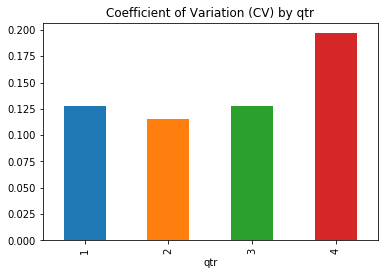

In [48]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()


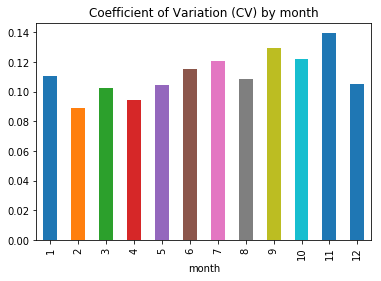

In [49]:
data.groupby("month")["energy"].std().divide(data.groupby("month")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by month")
plt.show()


# Time Series Analysis: Seasonality and Trend

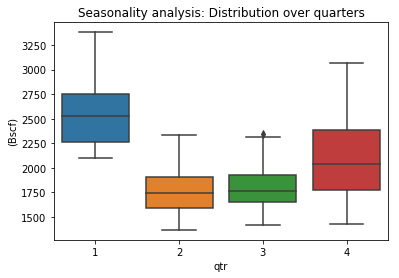

In [50]:
sns.boxplot(data=data, x="qtr", y="energy")
plt.title("Seasonality analysis: Distribution over quarters")
plt.ylabel("(Bscf)")
plt.show()


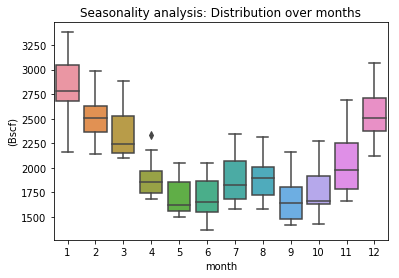

In [51]:
sns.boxplot(data=data, x="month", y="energy")
plt.title("Seasonality analysis: Distribution over months")
plt.ylabel("(Bscf)")
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


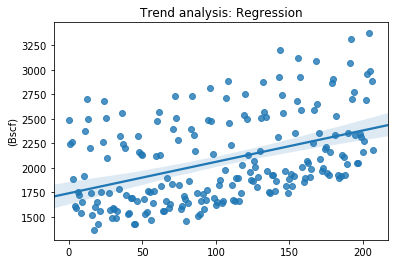

In [52]:
sns.regplot(data=data,x="ix", y="energy")
plt.title("Trend analysis: Regression")
plt.ylabel("(Bscf)")
plt.xlabel("")
plt.show()


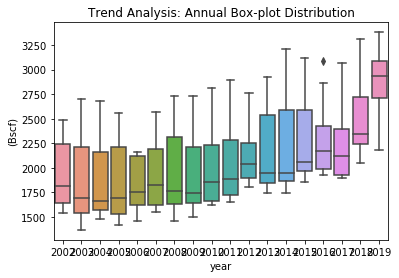

In [53]:
sns.boxplot(data=data, x="year", y="energy")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("(Bscf)")
plt.show()


# Feature Engineering

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


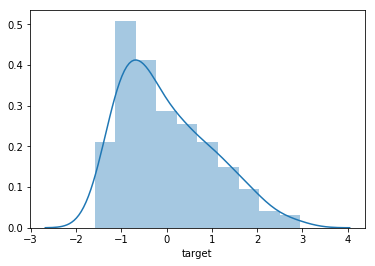

In [54]:
data["target"] = data["energy"].add(-mean).div(std)
data["normalized_comm_price"] = data["comm price"].add(-mean_comm_price).div(std_comm_price)
data["normalized_elec_price"] = data["elec price"].add(-mean_elec_price).div(std_elec_price)
data["normalized_ind_price"] = data["ind price"].add(-mean_ind_price).div(std_ind_price)
data["normalized_res_price"] = data["res price"].add(-mean_res_price).div(std_res_price)
sns.distplot(data["target"])
plt.show()


In [55]:
# sns.distplot(data["normalized_price"])
# plt.show()

In [56]:
shapiro_test(data.target, alpha=0.05)


H0: Data was drawn from a Normal Ditribution
pval 3.5073006188213185e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected


In [81]:
features = []
corr_features=[]
targets = []
    
data["target_t0"] = data["target"]
targets.append("target_t0")
    
tau = 12 #forecasting periods
for t in range(1, tau+1):
    data["feat_comm_pr" + str(t)] = data["normalized_comm_price"].shift(-t) 
    data["feat_elec_pr" + str(t)] = data["normalized_elec_price"].shift(-t)
    data["feat_ind_pr" + str(t)] = data["normalized_ind_price"].shift(-t)
    data["feat_res_pr" + str(t)] = data["normalized_res_price"].shift(-t)
    features.append("feat_comm_pr" + str(t))
    features.append("feat_elec_pr" + str(t))
    features.append("feat_ind_pr" + str(t))
    features.append("feat_res_pr" + str(t))
    
for t in range(1, 13):
    data["feat_ar" + str(t)] = data["target"].shift(-t) 
    features.append("feat_ar" + str(t))
    
features.append("normalized_comm_price")
features.append("normalized_elec_price")
features.append("normalized_ind_price")
features.append("normalized_res_price")

In [82]:
features

['feat_comm_pr1',
 'feat_elec_pr1',
 'feat_ind_pr1',
 'feat_res_pr1',
 'feat_comm_pr2',
 'feat_elec_pr2',
 'feat_ind_pr2',
 'feat_res_pr2',
 'feat_comm_pr3',
 'feat_elec_pr3',
 'feat_ind_pr3',
 'feat_res_pr3',
 'feat_comm_pr4',
 'feat_elec_pr4',
 'feat_ind_pr4',
 'feat_res_pr4',
 'feat_comm_pr5',
 'feat_elec_pr5',
 'feat_ind_pr5',
 'feat_res_pr5',
 'feat_comm_pr6',
 'feat_elec_pr6',
 'feat_ind_pr6',
 'feat_res_pr6',
 'feat_comm_pr7',
 'feat_elec_pr7',
 'feat_ind_pr7',
 'feat_res_pr7',
 'feat_comm_pr8',
 'feat_elec_pr8',
 'feat_ind_pr8',
 'feat_res_pr8',
 'feat_comm_pr9',
 'feat_elec_pr9',
 'feat_ind_pr9',
 'feat_res_pr9',
 'feat_comm_pr10',
 'feat_elec_pr10',
 'feat_ind_pr10',
 'feat_res_pr10',
 'feat_comm_pr11',
 'feat_elec_pr11',
 'feat_ind_pr11',
 'feat_res_pr11',
 'feat_comm_pr12',
 'feat_elec_pr12',
 'feat_ind_pr12',
 'feat_res_pr12',
 'feat_ar1',
 'feat_ar2',
 'feat_ar3',
 'feat_ar4',
 'feat_ar5',
 'feat_ar6',
 'feat_ar7',
 'feat_ar8',
 'feat_ar9',
 'feat_ar10',
 'feat_ar11',
 'f

In [83]:
corr = data[targets + features].corr()
print(corr)

                       target_t0  feat_comm_pr1  feat_elec_pr1  feat_ind_pr1  \
target_t0               1.000000      -0.333579      -0.230463     -0.209470   
feat_comm_pr1          -0.333579       1.000000       0.870518      0.903076   
feat_elec_pr1          -0.230463       0.870518       1.000000      0.974945   
feat_ind_pr1           -0.209470       0.903076       0.974945      1.000000   
feat_res_pr1           -0.458586       0.606675       0.284822      0.300243   
feat_comm_pr2          -0.311383       0.970006       0.802323      0.842994   
feat_elec_pr2          -0.285376       0.909881       0.946396      0.970350   
feat_ind_pr2           -0.275272       0.910167       0.908185      0.950784   
feat_res_pr2           -0.270339       0.543572       0.234091      0.257626   
feat_comm_pr3          -0.268691       0.916100       0.739683      0.780659   
feat_elec_pr3          -0.352617       0.899314       0.873957      0.907364   
feat_ind_pr3           -0.345837       0

In [84]:
# # Plot heatmap of correlation matrix
# sns.heatmap(corr, annot=True)
# plt.title("Pearson Correlation with 1 period target")
# plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
# plt.tight_layout()  # fits plot area to the plot, "tightly"
# plt.show()  # show the plot

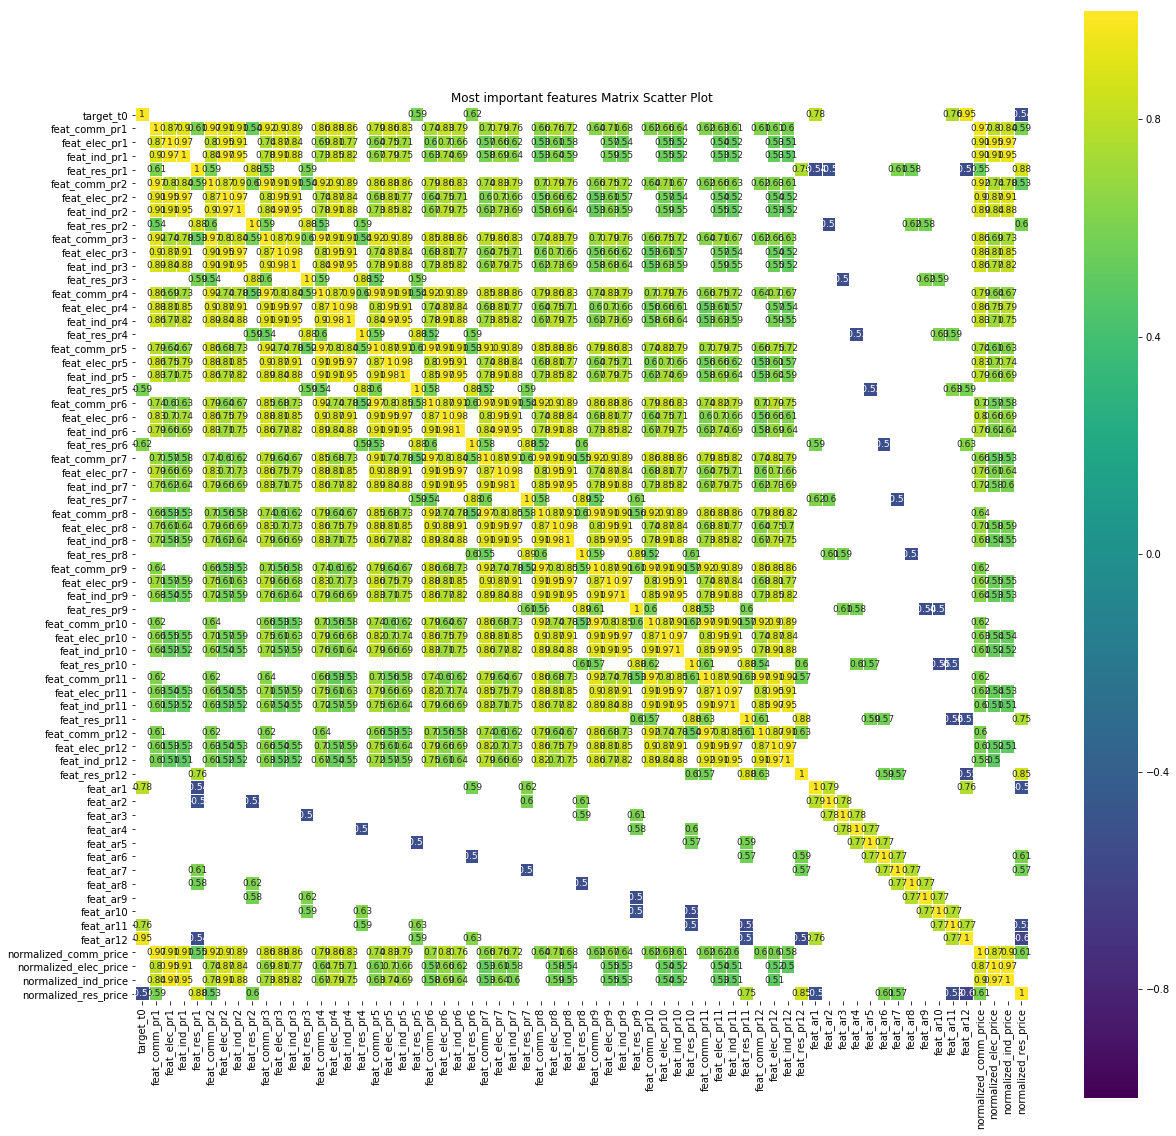

In [85]:
top5_mostCorrFeats = corr["target_t0"].apply(abs).sort_values(ascending=False).index.values[:6]
# sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.figure(figsize=(20,20))
Corr_thr_DepVSInd = 0.5
sns.heatmap(corr[(corr >= Corr_thr_DepVSInd) | (corr <= -Corr_thr_DepVSInd)],
          cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1,
          annot=True,annot_kws={"size":9},square=True)

plt.title("Most important features Matrix Scatter Plot")
plt.show()

There are some features that are quite strongly linearly correlated with target, like AR_6 and MOVAVE_7, let's build some models and check this assumption

# Model Building

In this step, two candidates models are build using an nice feature in Scikit-Learn such us MultiOutput Regression, it provides a framework to automatically and easily fit models to predict several target variables. (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html)

First a baseline model (linear regression) will be fit and compared to a more advanced model, like Random Forest. A linear model does not need hyperparamenter tunning, and there is some correlation in data, so it is a strongh foundation, but there are several caveats:

- Target variable is not perfectly normally distributed with constant variance

- There are a lot of multicollinearity among predictors

- Observations are not independent

On the other hand an advanced model, like Random Forest, needs to perform hyperparamenter tunning, tipically it is solved by using GridSearch and Cross Validation, but time series data is not suitable to be used in CV, because data is shuffled in order to build k-folds. On the other hand, Scikit-Learng provide us with a nice solution: TimeSeries Splits, that respect time structure of date and iterativelly allow us to perform GridSearch

In [86]:
data_feateng = data[["year"] + features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)


Number of observations:  196


Split Data

Data points in 2018 are used as a holdout data to perform a honest assessment of model performance and carry out some residual analysis (6 months)

Total number of observations:  196
Train: (168, 64)(168, 1), 
Test: (28, 64)(28, 1)


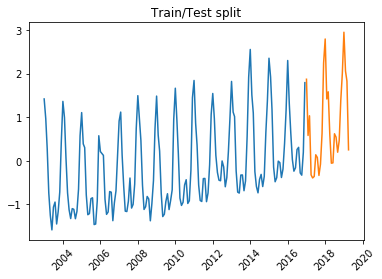

In [87]:
train_test_split = 2017
X_train = data_feateng[features].loc[data_feateng["year"]<train_test_split]
y_train = data_feateng[targets].loc[data_feateng["year"]<train_test_split]

X_test = data_feateng[features].loc[data_feateng["year"]>=train_test_split]
y_test = data_feateng[targets].loc[data_feateng["year"]>=train_test_split]


n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

# plt.plot(y_train.index, y_train["target_t1.values"], label="train")
# plt.plot(y_test.index, y_test["target_t1.values"], label="test")

plt.plot(y_train.index, y_train["target_t0"], label="train")
plt.plot(y_test.index, y_test["target_t0"], label="test")

plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()


Baseline Model: Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train["target_t0"])
p_train = reg.predict(X_train)
p_test = reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t0"], p_train))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t0"], p_test))
R2_train = r2_score(y_train["target_t0"], p_train)
R2_test = r2_score(y_test["target_t0"], p_test)

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )
print("Train R2: {}\nTest R2: {}".format(R2_train, R2_test) )



Train RMSE: 0.16302414805352863
Test RMSE: 0.3593600589482532
Train R2: 0.9702845593953282
Test R2: 0.8646370295012926


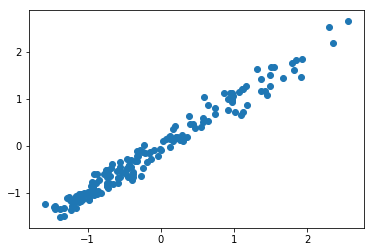

In [90]:
plt.scatter(y_train["target_t0"], p_train, label="train")


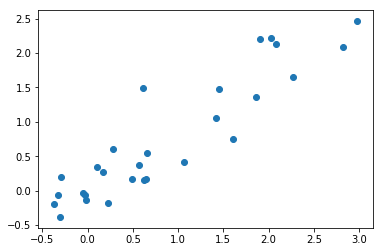

In [38]:
plt.scatter(y_test["target_t0"], p_test, label="test")


Train a Random Forest with Time Series Split to tune Hyperparameters

In this example, TimeSeriesSplit framework is shown, on each fold, train data is closer to the beginning of forecasting period

TRAIN: 42 TEST: 42


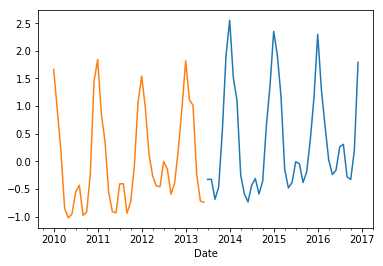

TRAIN: 84 TEST: 42


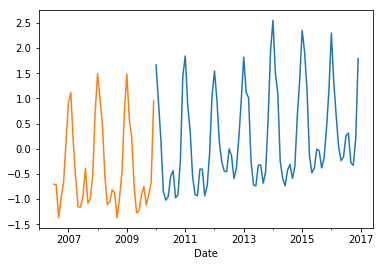

TRAIN: 126 TEST: 42


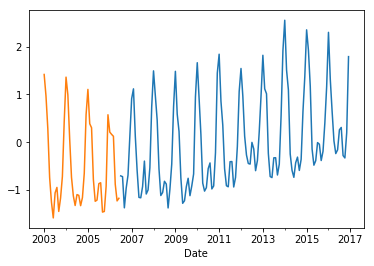

In [91]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t0"][train_index].plot()
    y_train["target_t0"][val_index].plot()
    plt.show()
    

In [92]:
from sklearn.ensemble import RandomForestRegressor

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx

splits = TimeSeriesSplit(n_splits=3, max_train_size=12*2)
rfr = RandomForestRegressor()
# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [500], 
        'max_depth': [3, 5, 10, 20, 30 ,40, 50], 
        'max_features': [10, 8, 5, 20, 15], 
        'random_state': [123]}
rfr_paramGrid = ParameterGrid(rfr_grid)

CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t0"])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 10}
Best-Fold Train RMSE:  0.017493308652711276
Best-Fold Val RMSE:  0.1467408284833307


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 15, 'max_depth': 10}
Best-Fold Train RMSE:  0.01585187906286346
Best-Fold Val RMSE:  0.8651624889499979


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 3}
Best-Fold Train RMSE:  0.02676185863570225
Best-Fold Val RMSE:  0.4465888676507138




In [93]:
CV_rfr_tup[2]


3

In [94]:
rfr_paramGrid[CV_rfr_tup[2]]


{'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 3}

In [95]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train, y_train["target_t0"])



Feature importance

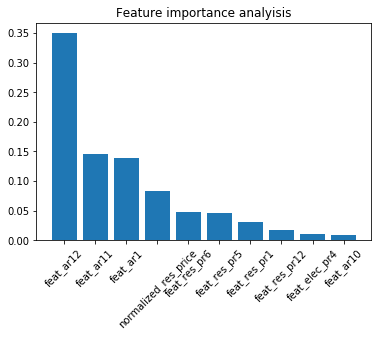

In [96]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()


# Model Assessment:

Performance Metrics: MAPE (Mean Absolute Percent Error)

Even though RMSE is a very common performance metric, MAPE is very suitable to use, and much easer to understand and communicate. Let's use one period ahead model to compute MAPE in test period

In [97]:
p_train = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t0"]- p_train

p_test = best_rfr.predict(X_test)
test_resid_1step = y_test["target_t0"]- p_test



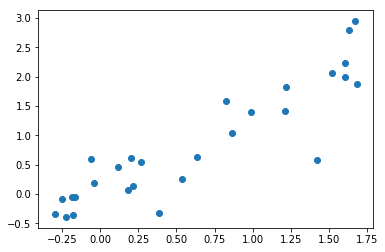

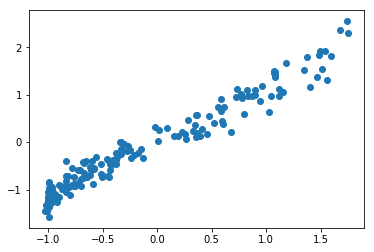

In [98]:
plt.scatter(p_test, y_test["target_t0"])
plt.show()
plt.scatter(p_train, y_train["target_t0"])
plt.show()



In [99]:
test_df = y_test[["target_t0"]]*std+mean
test_df["pred_t0"] = p_test*std+mean
test_df["resid_t0"] = test_df["target_t0"].add(-test_df["pred_t0"])
test_df["abs_resid_t0"] = abs(test_df["resid_t0"])
test_df["ape_t0"] = test_df["resid_t0"].div(test_df["target_t0"])
test_MAPE = test_df["ape_t0"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE)



1-period ahead forecasting MAPE:  3.1725856140307416


In [100]:
train_df = y_train[["target_t0"]]*std+mean
train_df["pred_t0"] = p_train*std+mean

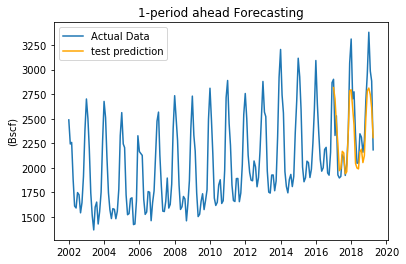

In [101]:
plt.plot(data["energy"], label="Actual Data")
# plt.plot(test_df[["target_t0"]], label="test data", color="b")
plt.plot(test_df[["pred_t0"]], label="test prediction", color="orange")

plt.title("1-period ahead Forecasting")
plt.ylabel("(Bscf)")
plt.legend()
plt.show()


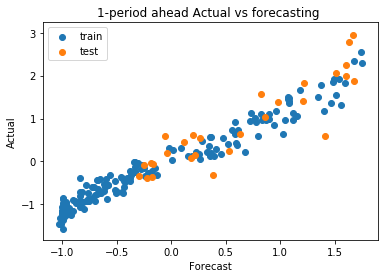

In [102]:
plt.scatter(y=y_train["target_t0"],x=p_train, label="train")
plt.scatter(y=y_test["target_t0"],x=p_test, label="test")
plt.title("1-period ahead Actual vs forecasting ")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.show()


Plotting actual vs forecasted provides a glance on how good model can fit train data and generalize to test data

# Residual Analysis

In order to perform a comprehensive exercise, a residual analysis is carried out, in order to verify:

- Is there some skewness in forecasting (tendendy to over or under forecast)?
     - Verify that residuals are normally distributed
- Does outliers impact on performance? Is there any information remaining on residuals?
    - Residual over time
    - Plot Residual vs Actual

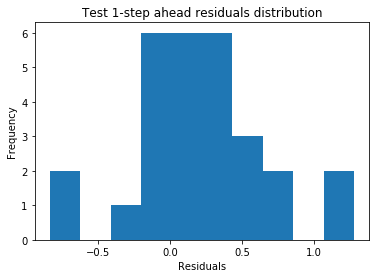

In [103]:
test_resid_1step.plot.hist(bins=10, title="Test 1-step ahead residuals distribution")
plt.xlabel("Residuals")
plt.show()


H0: Data was drawn from a Normal Ditribution
pval 0.6652746200561523 is higher than significance level: 0.05, therefore null hypothesis cannot be rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


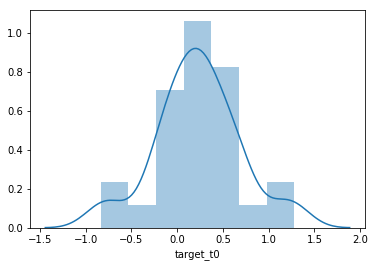

In [104]:
sns.distplot(test_resid_1step)
shapiro_test(test_resid_1step, alpha=0.05)


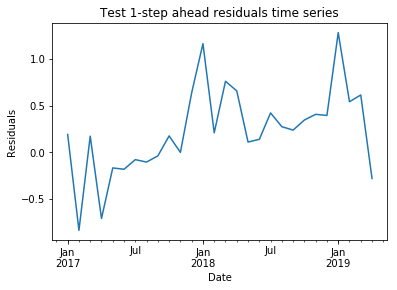

In [105]:
test_resid_1step.plot(title="Test 1-step ahead residuals time series")
plt.ylabel("Residuals")
plt.show()


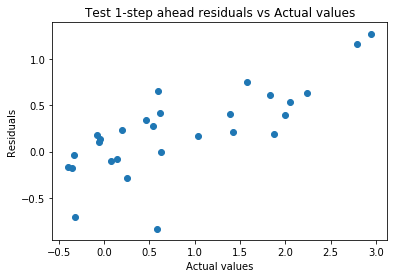

In [106]:
plt.scatter(x=y_test["target_t0"].values, y=test_resid_1step.values)
plt.title("Test 1-step ahead residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.show()


Muti-period ahead model building

Once we know the best hiperparam set, a new instance of the RF model can be fit on the most recent (and relevant) data. Usually, it is considered that at least 2 years are needed in order to produce a long term daily forecast. Let's re-train a family of RF models using MultiOutput Regressor feature.

In [ ]:
# multi_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
#     fit(X_train, y_train['target_t0'])


In [ ]:
# p_train = multi_rfr.predict(X_train)
# train_resid_1step = y_train['target_t0']- p_train

# p_test = multi_rfr.predict(X_test)
# test_resid_1step = y_test['target_t0']- p_test


Performance Metrics: MAPE (Mean Absolute Percent Error)

Lastly, it is necesary to test forecasting accuracy in several periods, and assess whether it is stable.

In [ ]:
# periods = [1, 2, 3, 4]

# ytest_df = y_test['target_t0']*std+mean
# ptest_df = pd.DataFrame(data=p_test*std+mean, index=test_df.index, columns=["pred_t" + str(i) for i in range(1, 13)])
# test_df = pd.concat([ytest_df, ptest_df], axis=1)

# test_MAPE = []

# for t in periods:
#     test_df["resid_t" + str(t)] = test_df["target_t" + str(t)].add(-test_df["pred_t" + str(t)])
#     test_df["abs_resid_t" + str(t)] = abs(test_df["resid_t" + str(t)])
#     test_df["ape_t" + str(t)] = test_df["abs_resid_t" + str(t)].div(test_df["target_t" + str(t)])
#     test_MAPE.append(round(test_df["ape_t" + str(t)].mean(), 4)*100)

# print("MAPE test: ", test_MAPE)


In [ ]:
# mape_df = pd.DataFrame(index=periods, data={"test_MAPE": test_MAPE})
# mape_df.plot(kind="bar", legend=False)
# plt.title("Mean Absolute Percent Error in Test")
# plt.xlabel("Forecasting Period")
# plt.ylabel("%")
# plt.xticks(rotation=0)
# plt.show()


Not surprisingly, forecasting accuacy on 1 period INCREASES, more data, not always is better. Moreover, MAPE increases with forecasting horizon, but it seems quite stable.

Actual vs Forecasted

As previously stated, a quick way to assess model fit is to plot actual vs forecasted and take a glance at data scattering

In [ ]:
# #f, ax = plt.subplots(nrows=3,ncols=2)
# for t in periods:
#     test_df[["target_t" + str(t), "pred_t" + str(t)]].plot(x="pred_t" + str(t), y="target_t" + str(t) ,kind="scatter")
#     plt.title("{}-period(s) ahead forecasting".format(t))
#     plt.xlabel("Forecasted (MWh)")
#     plt.ylabel("Actual values (MWh)")
#     plt.xticks(rotation=45)
#     plt.show()

It can be seen that, as forecasting period is longer, scattering is greater, specially for extreme values

# Forecasting 30-days ahead

In [ ]:
# test_df.index = test_df.index.date


In [ ]:
# forecast_range = pd.date_range(start=np.max(test_df.index.values), periods=2*tau, freq="D")
# len(forecast_range)

In [ ]:
# forecast = []
# for t in range(0, tau):
#     #print(-(t+1), (t))
#     forecast = p_test[-(t+1):,(t)]*std+mean

In [ ]:
# t = 1
# p_test[-(t+1):,(t)]
# # p_test[-(t+1):]

In [ ]:
# p_test

In [ ]:
# test_df["target_t1"].plot()
# plt.scatter(x=test_df.index, y=test_df["pred_t1"], c="r", alpha=0.2, label="test preds")
# plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
# plt.ylabel("(MWh)")
# plt.xticks(rotation=45)
# plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
# plt.show()

In [ ]:
# plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
# plt.ylabel("(MWh)")
# plt.xticks(rotation=45)
# plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
# plt.show()

In [ ]:
# np.max(test_df.index.values)

In [ ]:
# forecast_range